# Machine Learning Project- Churn Prediction

### Set of instructions we will be following

1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to machine learning
algorithms.
5. Explore many different models and shortlist the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

### 1. Frame the problem and look at the big picture.

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

We will predict the customer's churn situation based on its attributes.

What could be done after detecting that the customer will churn? We could give them some gifts and maybe make them stay with us.

### 2. Get the data, and quickly look at its attributes(# of columns, rows, datatypes, etc.)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('telco_customer_churn.csv')
pd.set_option('display.max_columns', 50)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# tenure = Number of months the customer has stayed with the company, 0 means the customer has just signed up

In [8]:
# We can see that we don't have any missing values
# We have a lot of categorical variables that we need to encode
# most of them binary (yes/no)

### 3. Explore the data to gain insights.

In [9]:
# first I want to create a copy of the original dataframe for my exploration session
df_exp = df.copy()

In [21]:
# what is the rate of churn?

rate_of_churn = df_exp['Churn'].value_counts()/len(df_exp)
rate_of_churn = rate_of_churn.reset_index()


In [30]:
rate_of_churn.columns = ['Churn', 'Percentage']
rate_of_churn['Percentage'] = rate_of_churn['Percentage']*100

[Text(0, 1, '73.5%'), Text(0, 1, '26.5%')]

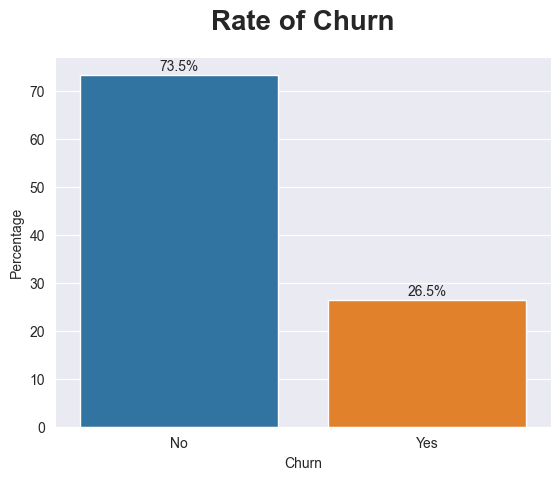

In [38]:
ax = sns.barplot(x="Churn", y="Percentage", data=rate_of_churn)

ax.set_title('Rate of Churn', fontsize=20, fontweight='bold', pad=20)
# sns.set_style("darkgrid")

ax.bar_label(ax.containers[0], fmt='%.1f%%', padding=1)

In [39]:
# So in our dataset, our churn and not churn are not equally distributed
# So this means that we need to use stratified sampling when we split our data into train and test sets
# Morover, when making evaluation metrics, we need to use recall and precision instead of accuracy

In [40]:
df_exp.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
# Dealing with Total Charges
 
df_exp["TotalCharges"] = pd.to_numeric(df_exp['TotalCharges'], errors='coerce')
 
df_exp["TotalCharges"].isnull().sum()

11

In [59]:
df_exp["TotalCharges"].fillna(0, inplace=True)

In [63]:
df_exp.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [64]:
df_exp.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

array([[<AxesSubplot: title={'center': 'TotalCharges'}>,
        <AxesSubplot: title={'center': 'tenure'}>],
       [<AxesSubplot: title={'center': 'MonthlyCharges'}>,
        <AxesSubplot: >]], dtype=object)

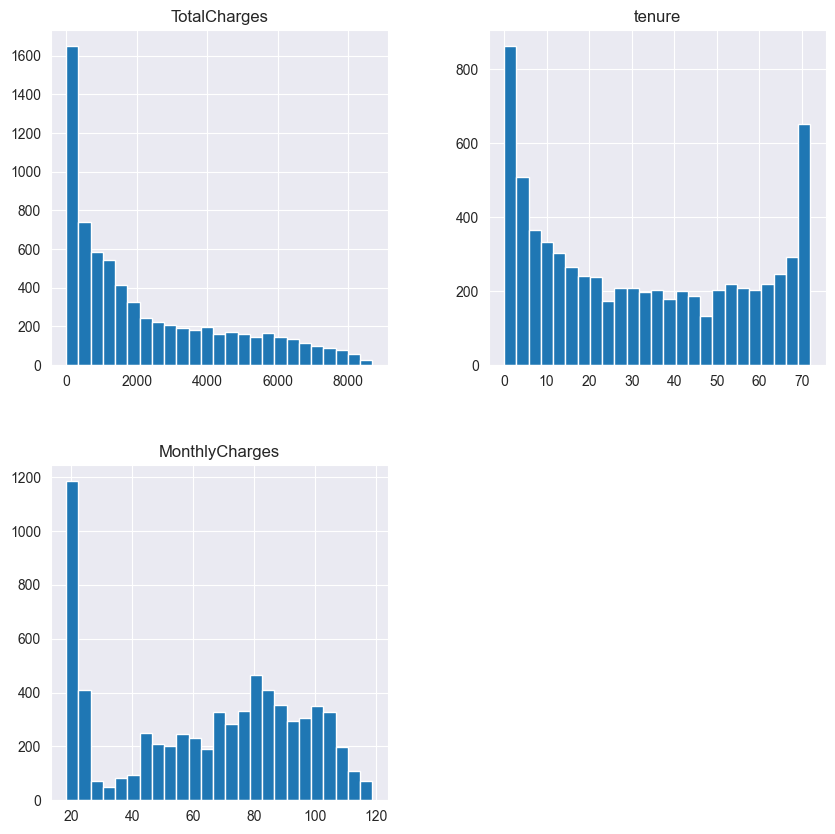

In [72]:
df_exp[["TotalCharges", "tenure", "MonthlyCharges"]].hist(figsize=(10, 10), bins=25)

In [73]:
# at first glance, it seems that the distribution of TotalCharges is skewed to the right, we could also say it is power law distributed
# at tenure interestingly, it has more customers both in the high values and low values.

In [75]:
df_exp["TotalCharges"].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [78]:
# I will first look at the np.log distribution of TotalCharges

# Let's standardscale our numerical variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_df = df_exp[["TotalCharges", "tenure", "MonthlyCharges"]]
scaler.fit(numerical_df)

scaled_numerical = scaler.transform(numerical_df)
scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical_df.columns)
scaled_numerical



,TotalCharges,tenure,MonthlyCharges
0,-0.992611,-1.277445,-1.160323
1,-0.172165,0.066327,-0.259629
2,-0.958066,-1.236724,-0.362660
3,-0.193672,0.514251,-0.746535
4,-0.938874,-1.236724,0.197365
...,...,...,...
7038,-0.127605,-0.340876,0.665992
7039,2.242606,1.613701,1.277533
7040,-0.852932,-0.870241,-1.168632
7041,-0.870513,-1.155283,0.320338


In [81]:
df_exp.drop(["TotalCharges", "tenure", "MonthlyCharges"], axis=1, inplace=True)
df_exp.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [82]:
df_exp = pd.concat([df_exp, scaled_numerical], axis=1)

In [83]:
df_exp["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [84]:
# Since No phone service is a subset of No, I will replace No phone service with No

df_exp["MultipleLines"].replace("No phone service", "No", inplace=True)



# 4. Prepare the data to better expose the underlying data patterns to machine learning algorithms.

In [85]:
# let's get into our df_mdl dataframe, which is the dataframe we will use for our modeling session
df_mdl = df_exp.copy()
df_mdl.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,TotalCharges,tenure,MonthlyCharges
0,7590-VHVEG,Female,0,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,-0.992611,-1.277445,-1.160323
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,-0.172165,0.066327,-0.259629
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,-0.958066,-1.236724,-0.362660
3,7795-CFOCW,Male,0,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,-0.193672,0.514251,-0.746535
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,-0.938874,-1.236724,0.197365


In [87]:
# First, I want to deal with the binary variables since they are alot and not in the format of 0 and 1
# Since gender is not in the format of Yes/No, I will deal with it first

df_mdl["gender"] = df_mdl["gender"].map({"Female":0, "Male":1})

In [103]:
yes_no_internet_cols = [col for col in df_mdl.columns if set(df_mdl[col].unique()) == {'Yes', 'No', 'No internet service'}]
yes_no_cols = [col for col in df_mdl.columns if set(df_mdl[col].unique()) == {'Yes', 'No'}]

yes_no_cols_total = yes_no_cols + yes_no_internet_cols
yes_no_cols_total 


['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'PaperlessBilling',
 'Churn',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [105]:
df_mdl[yes_no_cols_total] = df_mdl[yes_no_cols_total].replace({"Yes":1, "No":0, "No internet service":0})
df_mdl["OnlineSecurity"].value_counts()

0    5024
1    2019
Name: OnlineSecurity, dtype: int64

In [107]:
# I have changed the no internet service with 0 since it is a subset of no
df_mdl.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,TotalCharges,tenure,MonthlyCharges
0,7590-VHVEG,0,0,1,0,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,0,-0.992611,-1.277445,-1.160323
1,5575-GNVDE,1,0,0,0,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,0,-0.172165,0.066327,-0.259629
2,3668-QPYBK,1,0,0,0,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,1,-0.958066,-1.236724,-0.362660
3,7795-CFOCW,1,0,0,0,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),0,-0.193672,0.514251,-0.746535
4,9237-HQITU,0,0,0,0,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,1,-0.938874,-1.236724,0.197365


In [108]:
# let's drop the customerId 
df_mdl.drop("customerID", axis=1, inplace=True)

In [109]:
df_mdl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   PhoneService      7043 non-null   int64  
 5   MultipleLines     7043 non-null   int64  
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   int64  
 8   OnlineBackup      7043 non-null   int64  
 9   DeviceProtection  7043 non-null   int64  
 10  TechSupport       7043 non-null   int64  
 11  StreamingTV       7043 non-null   int64  
 12  StreamingMovies   7043 non-null   int64  
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   int64  
 15  PaymentMethod     7043 non-null   object 
 16  Churn             7043 non-null   int64  


In [110]:
# now we have 3 categorical variables, let's deal with them
cat_df = df_mdl.select_dtypes(include=['object'])
cat_df.head()

,InternetService,Contract,PaymentMethod
0,DSL,Month-to-month,Electronic check
1,DSL,One year,Mailed check
2,DSL,Month-to-month,Mailed check
3,DSL,One year,Bank transfer (automatic)
4,Fiber optic,Month-to-month,Electronic check


In [111]:
cat_df["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [112]:
cat_df["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [113]:
cat_df["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [117]:
# let2s one hot encode our categorical variables
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

encoder.fit(cat_df)

encoded_cat_df = encoder.transform(cat_df)
encoded_cat_df = pd.DataFrame(encoded_cat_df, columns=encoder.get_feature_names_out(cat_df.columns))
encoded_cat_df


c:\Users\User\pyver\py3108\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [120]:
# now let's drop the original categorical variables
# df_mdl.drop(cat_df.columns, axis=1, inplace=True)
# then concat the encoded categorical variables
df_mdl = pd.concat([df_mdl, encoded_cat_df], axis=1)
df_mdl

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,TotalCharges,tenure,MonthlyCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,-0.992611,-1.277445,-1.160323,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,-0.172165,0.066327,-0.259629,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,1,0,1,1,0,0,0,0,1,1,-0.958066,-1.236724,-0.362660,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,0,0,1,0,1,1,0,0,0,0,-0.193672,0.514251,-0.746535,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,1,0,0,0,0,0,0,0,1,1,-0.938874,-1.236724,0.197365,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,1,0,1,1,1,1,1,0,-0.127605,-0.340876,0.665992,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,0,0,1,1,1,1,0,1,1,0,1,1,1,0,2.242606,1.613701,1.277533,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,0,0,1,1,0,0,1,0,0,0,0,0,1,0,-0.852932,-0.870241,-1.168632,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1,1,1,0,1,1,0,0,0,0,0,0,1,1,-0.870513,-1.155283,0.320338,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [121]:
# everything is in the format of 0 and 1, so we are good to go to our modeling session

# 5. Explore many different models and shortlist the best ones.


In [122]:
# let's split our data into train and test sets in a stratified way

from sklearn.model_selection import train_test_split
X = df_mdl.drop("Churn", axis=1)
y = df_mdl["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [125]:
# let's look at the stratification of our train and test sets

y_train.value_counts()/len(X_train)
# it seems ok.

0    0.734647
1    0.265353
Name: Churn, dtype: float64

In [126]:
# let's start with logistic regression

from sklearn.linear_model import LogisticRegression

lg  = LogisticRegression()
lg.fit(X_train, y_train)
lg.score(X_test, y_test)


0.8055358410220014

<AxesSubplot: >

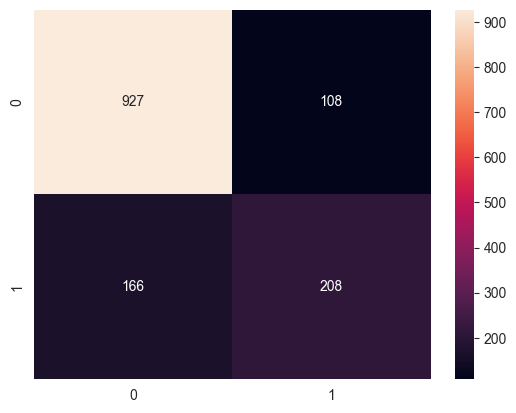

In [148]:
# 80% accuracy is not bad, but we need to look at the recall and precision

from sklearn.metrics import classification_report, confusion_matrix

y_pred = lg.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)

cm = confusion_matrix(y_test, y_pred)

classes = np.unique(y_test)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=classes, yticklabels=classes)




<AxesSubplot: >

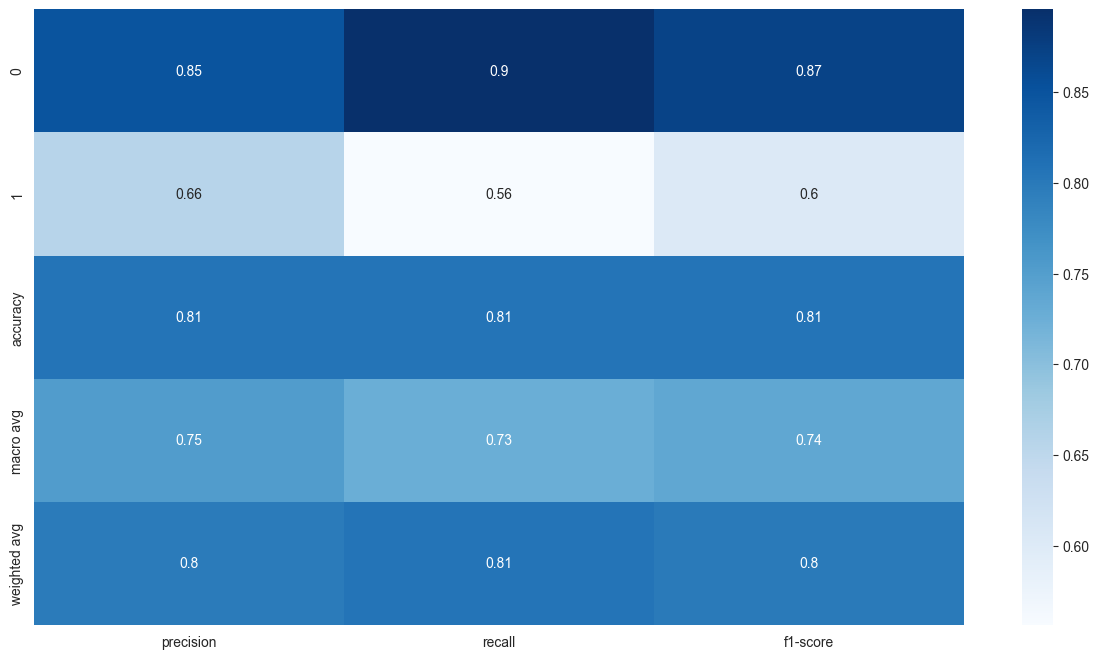

In [149]:
plt.figure(figsize=(15, 8))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')


In [150]:
# even though we have a high accuracy, we have a low recall and precision for the churn (1) class
# this is mostly because we have a class imbalance meaning 27% of our customers churned
# 73% of our customers did not churn # which actualyl means
# if we predict that all customers will not churn, we will be right 73% of the time
# which is why we need to look at recall and precision

In [151]:
# 56% recall means that we only predict 56% of the churned customers correctly
# which actually will damage the company since we will not be able to predict 
# the customers who will churn and we won't be able to keep them with us.

In [152]:
# let's try to apply a few other models and see if we can improve our recall and precision
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

<AxesSubplot: >

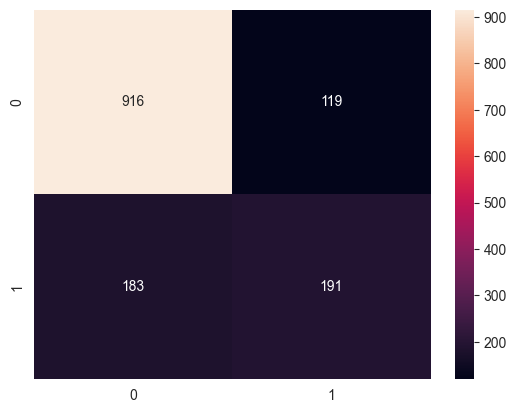

In [153]:
from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(y_test, y_pred, output_dict=True)

cm = confusion_matrix(y_test, y_pred)

classes = np.unique(y_test)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=classes, yticklabels=classes)

<AxesSubplot: >

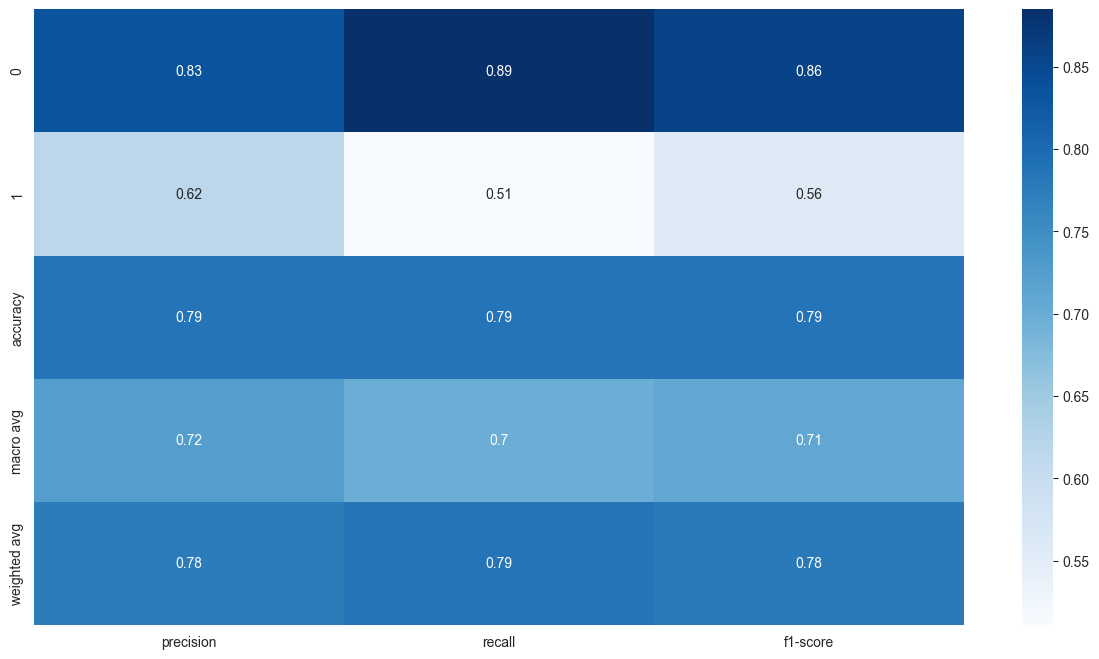

In [154]:
plt.figure(figsize=(15, 8))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')

In [155]:
# wow our recall has decreased :) 

In [156]:
# let's try decision tree

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

<AxesSubplot: >

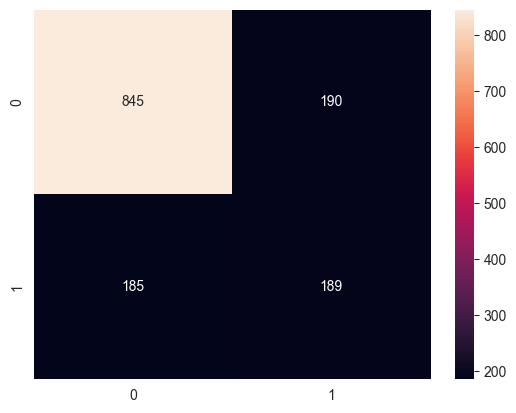

In [157]:
from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(y_test, y_pred, output_dict=True)

cm = confusion_matrix(y_test, y_pred)

classes = np.unique(y_test)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=classes, yticklabels=classes)

<AxesSubplot: >

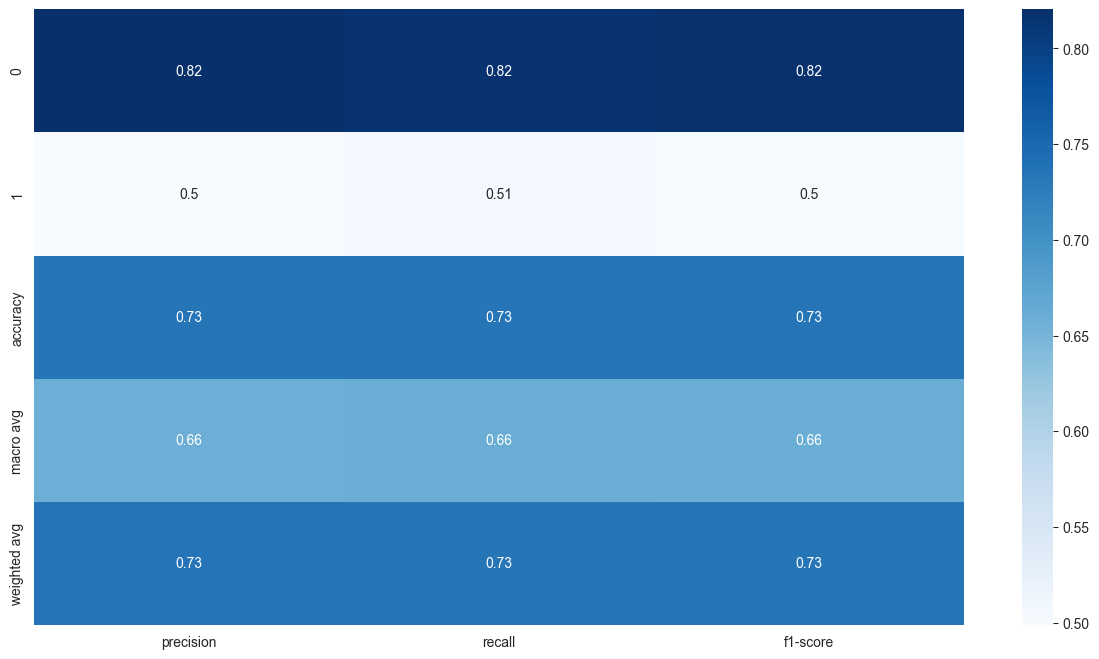

In [158]:
plt.figure(figsize=(15, 8))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')

In [159]:
# decision tree didin't really improved again.

In [161]:
# lastly let's try XGBoost

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

<AxesSubplot: >

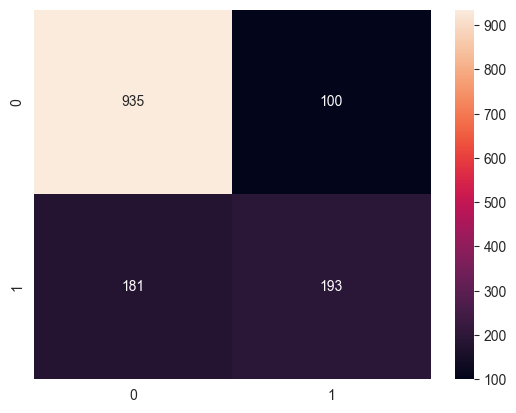

In [162]:
from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(y_test, y_pred, output_dict=True)

cm = confusion_matrix(y_test, y_pred)

classes = np.unique(y_test)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=classes, yticklabels=classes)

<AxesSubplot: >

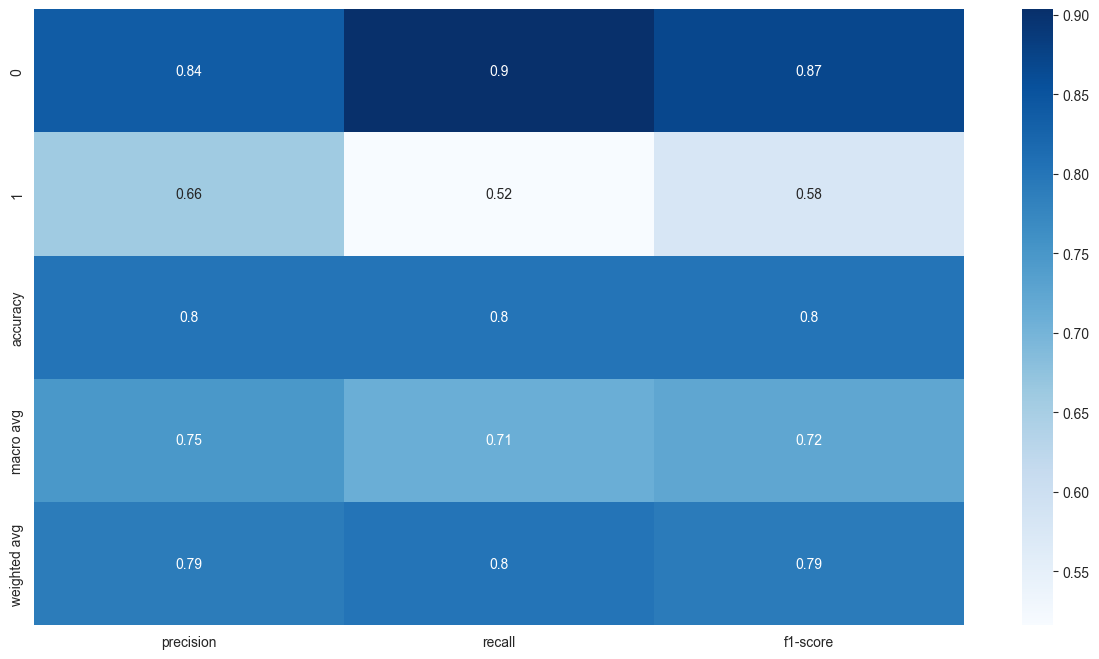

In [163]:
plt.figure(figsize=(15, 8))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')

In [164]:
# overall logistic regression did the best job in predicting the churned customers

# let's cross validate our logistic regression model

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(lg, X_train, y_train, cv=10)

csv = pd.DataFrame(cvs, columns=["Accuracy"])
csv







,Accuracy
0,0.842199
1,0.815603
2,0.806738
3,0.792553
4,0.811723
5,0.804618
6,0.788632
7,0.793961
8,0.799290
9,0.788632


In [165]:
# let's hyperparametr tune our logistic regression model

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

# Define the parameter grid to search
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'class_weight': [None, 'balanced']}

# Define the model
model = LogisticRegression(random_state=42)

# Define the scoring metric (in this case, recall)
scorer = make_scorer(recall_score)

# Define the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scorer)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding recall score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best recall score: ", grid_search.best_score_)


c:\Users\User\pyver\py3108\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\pyver\py3108\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Best hyperparameters:  {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}
Best recall score:  0.8046822742474916


c:\Users\User\pyver\py3108\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\pyver\py3108\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\pyver\py3108\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\User\pyver\py3108\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueErr

In [166]:
    """Best hyperparameters:  {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}
Best recall score:  0.8046822742474916
    """
    
# it has given us the best hyperparameters for our model
# and our recall score has increased to 80% from 56% which is great

"Best hyperparameters:  {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}\nBest recall score:  0.8046822742474916\n"

In [167]:
y_pred = grid_search.best_estimator_.predict(X_test)

<AxesSubplot: >

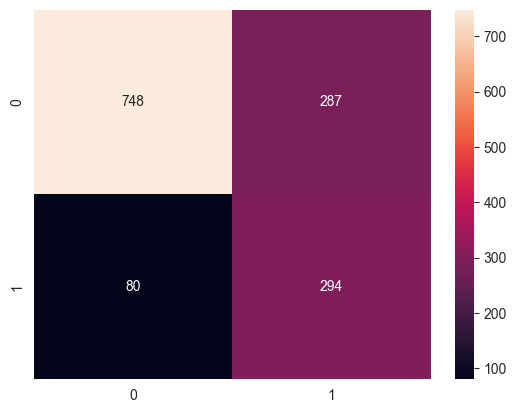

In [168]:

from sklearn.metrics import classification_report, confusion_matrix


report = classification_report(y_test, y_pred, output_dict=True)

cm = confusion_matrix(y_test, y_pred)

classes = np.unique(y_test)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=classes, yticklabels=classes)

<AxesSubplot: >

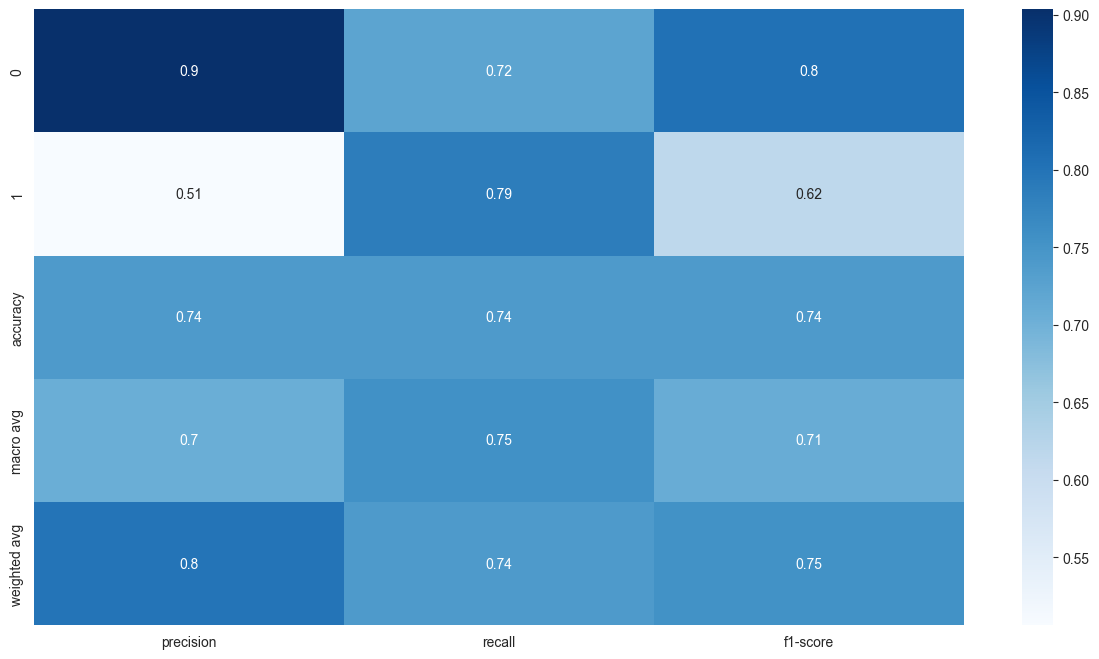

In [169]:
plt.figure(figsize=(15, 8))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')

In [170]:
294+80

374

In [171]:
294/374

0.786096256684492

In [172]:
# as we can see, our recall score has increased to 79% from 56% which is great
# however , we can see that our precision score has decreased and there is a trade off btw recall and precision
# let's draw this on the graph to see how it looks like.

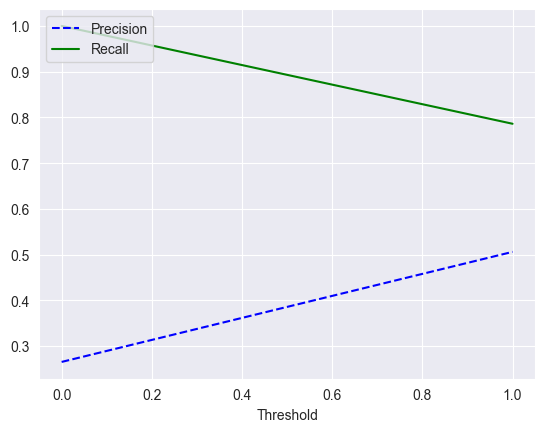

In [174]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")

Text(0, 0.5, 'Precision')

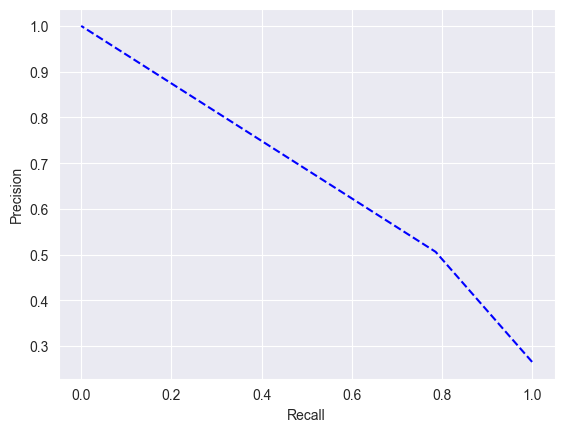

In [177]:
plt.plot(recalls, precisions, "b--", label="Precision/Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")

In [178]:
# this is not a good curve since it is not close to the top left corner
# it is not rounded.
# but clearly shows that there is a trade off between precision and recall